In [1]:
#Cargar datos, módulos y librerias necesarios.
import os
import zipfile
import numpy
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn import model_selection
from sklearn.feature_selection import SelectPercentile, f_classif
#from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from warnings import filterwarnings
filterwarnings('ignore')

------------ Dataset  KDD.txt Pruebas -------------

In [2]:
#Cargar data set (KDD.txt)
dataset = pd.read_csv('DataSets/KDD.txt', header=None)

In [3]:
#Visualizacion de la dimensionalidad del dataset
print(dataset.shape)

#Visualizacion de las cabeceras
print(dataset.head(20))

#Estadísticas sobre el dataset
#The information is:
    #count: number of terms by columns
    #mean: average value of the column
    #std: standard deviation of the column
    #max: maximum value of the column
    #min: minimum value of the column
    #limit of each of the quartiles
    #More information can be obtained with "include = all".
dataset.describe()
dataset.describe(include = "all")

#Visualizar un resumen de los datos.
dataset.info()

(25192, 43)
    0     1           2    3    4      5   6   7   8   9   ...    33    34  \
0    0   tcp    ftp_data   SF  491      0   0   0   0   0  ...  0.17  0.03   
1    0   udp       other   SF  146      0   0   0   0   0  ...  0.00  0.60   
2    0   tcp     private   S0    0      0   0   0   0   0  ...  0.10  0.05   
3    0   tcp        http   SF  232   8153   0   0   0   0  ...  1.00  0.00   
4    0   tcp        http   SF  199    420   0   0   0   0  ...  1.00  0.00   
5    0   tcp     private  REJ    0      0   0   0   0   0  ...  0.07  0.07   
6    0   tcp     private   S0    0      0   0   0   0   0  ...  0.04  0.05   
7    0   tcp     private   S0    0      0   0   0   0   0  ...  0.06  0.07   
8    0   tcp  remote_job   S0    0      0   0   0   0   0  ...  0.09  0.05   
9    0   tcp     private   S0    0      0   0   0   0   0  ...  0.05  0.06   
10   0   tcp     private  REJ    0      0   0   0   0   0  ...  0.05  0.07   
11   0   tcp     private   S0    0      0   0   0   

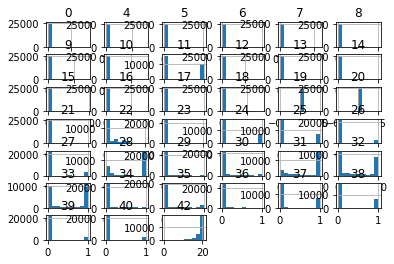

In [4]:
# Generar un Histograma de los datos.
dataset.hist()
plt.show()

-------------------------- PREPARACIÓN Y LIMPIEZA DEL DATASET -------------------

In [5]:
#Quitar la última columna. Esta columna fue añadida a los experimentos llevados a cabo por el Instituto Canadiense NSL-KDD, pero no contiene información útil para nuestro propósito.

columns = dataset.columns.tolist()
end=dataset.columns[len(columns)-1]
dataset.drop(end, axis=1, inplace=True)
dataset

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,warezclient
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune


In [6]:
#Compruebe las columnas, estudiando sus valores máximos y minx, valores únicos, etc.
#Podemos analizar los valores estadísticos de todas las columnas o podemos verlas aumentando el número de columnas
#Vamos a mostrar las primeras 12 filas y analizarlas, luego lo haremos en incrementos a 10:

dataset.iloc[:,0:12].describe(include="all")
dataset.iloc[:,13:23].describe(include="all")
dataset.iloc[:,23:33].describe(include="all")
dataset.iloc[:,33:43].describe(include="all")

,33,34,35,36,37,38,39,40,41
count,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13449
mean,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769,NaN
std,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,NaN


In [7]:
#Limpieza de informacion, las columnas 19 y 20 son 0 o NaN
dataset.drop(columns=[19, 20], axis=1, inplace=True)

In [8]:
#Comprobacion de que ha sido eliminadas
dataset.iloc[:,13:23].describe(include="all")

,13,14,15,16,17,18,21,22,23,24
count,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,0.001548,0.001350,0.249841,0.014727,0.000357,0.004327,0.009130,84.591180,27.698754,0.286338
std,0.039316,0.048785,11.500842,0.529602,0.018898,0.098524,0.095115,114.673451,72.468242,0.447312
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,8.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,144.000000,18.000000,1.000000
max,1.000000,2.000000,975.000000,40.000000,1.000000,8.000000,1.000000,511.000000,511.000000,1.000000


------------------ OTRO TIPO DE LIMPIEZA ----------------

In [9]:
# visualizar si la suma de cada columna da null
dataset.isnull().sum()

#visualizar si algun dato es Nan
dataset.isna()

#Si hay algun dato usar:
#Remove null values
#dataset.dropna(inplace = True)

#Drop the rows only if all of the values in the row are missing
#dataset.dropna(how='all',inplace=True)

#Drop a column (variable) that has some missing values.
#dataset.dropna(axis=1,inplace=True)

#Replace with mean. Suitable for continuous data without outliers
#dataset.Column_Name.fillna(dataset.Column_Name.mean(),inplace=True)

#Replace with median. Suitable for continuous data with outliers
#dataset.Column_Name.fillna(dataset.Column_Name.median(),inplace=True)

#For categorical feature you can select to fill in the missing values with the most common value (Mode)
#dataset.Column_Name.fillna(dataset.Column_Name.mode()[0], inplace=True)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
25188,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
25189,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
25190,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


------------------- Eliminar los valores atípicos con el rango intercuartil ---------


In [10]:
#Los valores atipicos son aquellos alejados de la media.
#Se van a elimar los datos más lejos de 1.5*IQR lejos de la media (Errores menores) y los que estan a 3*IQR lejos de la media (Errores Graves)

# * IQR =  Rango intercuartil, rango entre la mediana de la mitad superior y la mediana de la mitad inferior de los datos. 

#Calculo de IQR.
Q1 = dataset.quantile(0.25) #Mitad superior
Q3 = dataset.quantile(0.75) #Mitad inferior
IQR = Q3 - Q1
print(IQR)

0       0.00
4     279.00
5     530.25
6       0.00
7       0.00
8       0.00
9       0.00
10      0.00
11      1.00
12      0.00
13      0.00
14      0.00
15      0.00
16      0.00
17      0.00
18      0.00
21      0.00
22    142.00
23     16.00
24      1.00
25      1.00
26      0.00
27      0.00
28      0.91
29      0.06
30      0.00
31    171.00
32    245.00
33      0.95
34      0.07
35      0.06
36      0.02
37      1.00
38      1.00
39      0.00
40      0.00
dtype: float64


In [11]:
#Conseguir Retencion en valores atipicos.
dataset_out = dataset[~((dataset < (Q1 - 1.5 * IQR)) | (dataset > (Q3 + 1.5 * IQR))).any(axis=1)]
dataset_out.shape

(8087, 40)

---------------------- X and Y Sets --------------------
Una vez tenemos el dataset con los puntos dentro del IQR, se calculará X e Y

* X Contendrá las características
* Y: Contendrá el objetivo

In [12]:
columns = dataset_out.columns.tolist() #get the columns
columns_features = columns[:len(columns)-1] #drop the last one
print(columns_features)
end_transf=dataset_out.columns[len(columns)-1]

X=dataset_out.loc[:,columns_features] #features
Y=dataset_out.loc[:,end_transf] #target

print(X)
print(Y)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
       0    1           2   3   4   5   6   7   8   9   ...   31  32    33  \
2       0  tcp     private  S0   0   0   0   0   0   0  ...  255  26  0.10   
6       0  tcp     private  S0   0   0   0   0   0   0  ...  255   9  0.04   
7       0  tcp     private  S0   0   0   0   0   0   0  ...  255  15  0.06   
8       0  tcp  remote_job  S0   0   0   0   0   0   0  ...  255  23  0.09   
9       0  tcp     private  S0   0   0   0   0   0   0  ...  255  13  0.05   
...    ..  ...         ...  ..  ..  ..  ..  ..  ..  ..  ...  ...  ..   ...   
25178   0  tcp     private  S0   0   0   0   0   0   0  ...  255  17  0.07   
25179   0  tcp     private  S0   0   0   0   0   0   0  ...  255  13  0.05   
25180   0  tcp       vmnet  S0   0   0   0   0   0   0  ...  255  20  0.08   
25190   0  tcp        nnsp  S0   0   0   0   0   0   0  ...  255  20  0.0

--------------Manejar características categóricas------------

In [13]:
#Check types with dtypes
X.dtypes

0       int64
1      object
2      object
3      object
4       int64
5       int64
6       int64
7       int64
8       int64
9       int64
10      int64
11      int64
12      int64
13      int64
14      int64
15      int64
16      int64
17      int64
18      int64
21      int64
22      int64
23      int64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31      int64
32      int64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
dtype: object

In [14]:
#Select the columns which are 'object'
print(X.select_dtypes(include='object'))
index = X.select_dtypes(include='object').columns
index

#Se puede observar que las variables 1, 2 y 3 son categoricas.

         1           2   3
2      tcp     private  S0
6      tcp     private  S0
7      tcp     private  S0
8      tcp  remote_job  S0
9      tcp     private  S0
...    ...         ...  ..
25178  tcp     private  S0
25179  tcp     private  S0
25180  tcp       vmnet  S0
25190  tcp        nnsp  S0
25191  tcp      finger  S0

[8087 rows x 3 columns]


Int64Index([1, 2, 3], dtype='int64')

In [15]:
# Con select_dtypes se selecciona todas las columnas con un determinado tipo d en una trama de objetos, para luego aplicar cat.codes en cada una de las columnas.

X.loc[:,1:3]=X.loc[:,1:3].astype('category')

cat_columns = X.select_dtypes(['category']).columns
cat_columns

X[cat_columns] = X[cat_columns].apply(lambda x: x.cat.codes)
#print(X.info())

#X.loc[:,1:3]

------------ Transformacion de las variables categóricas-----------


In [16]:
#  Transformaciones de variables categóricas
print(X.groupby(X.loc[:,1]).size())

1
0      54
1    7893
2     140
dtype: int64


In [17]:
print(X.loc[:,1].value_counts())

1    7893
2     140
0      54
Name: 1, dtype: int64


In [18]:
var_dummies = []
for i in [1, 2, 3]:
    var_dummies.append(pd.get_dummies(X, columns=[i]));

Transform attack_type to the 4 values (DOS, U2R, R2L, probe):

back to DOS

buffer_overflow to U2R

ftp_write to R2L

guess_passwd to R2L

imap to R2L

ipsweep to probe

land to DOS

loadmodule to U2R

multihop to R2L

neptune to DOS

nmap to probe

perl to U2R

phf to R2L

pod to DOS

portsweep to probe

rootkit to U2R

satan to probe

smurf to DOS

spy to R2L

teardrop to DOS

warezclient to R2L

warezmaster to R2L


The other class is normal

Now, assign a numeric value to class attacks where:

DOS = 1

U2R = 2

R2L = 3

probe = 4

normal = 5

You can do all the transformations at once.

In [19]:
#Asignacion datos numéricos a la variable de destino
Y = Y.replace({ 'neptune': 1,
                'back': 1, 
                'land': 1, 
                'pod': 1, 
                'smurf': 1, 
                'teardrop': 1,
                'ipsweep' : 4,
                'nmap' : 4,
                'portsweep': 4,
                'satan': 4,
                'ftp_write': 3,
                'guess_passwd': 3,
                'imap': 3,
                'multihop': 3,
                'phf': 3,
                'spy': 3,
                'warezclient': 3,
                'warezmaster': 3,
                'buffer_overflow': 2,
                'loadmodule': 2,
                'perl': 2,
                'rootkit': 2,
                'normal': 5})

# Make sure that each element is an integer
Y = Y.astype('int')
print(Y)
print(Y.groupby(Y).size())

#Se muestra el número de ataques en cada categoría, el ataque DOS (1) es el más repetido, seguido de los ataques normales (5) y los últimos ataques de sondeo (4), U2R (2) y R2L (3) no aparecen.

2        1
6        1
7        1
8        1
9        1
        ..
25178    1
25179    1
25180    1
25190    1
25191    1
Name: 41, Length: 8087, dtype: int32
41
1    6470
4      12
5    1605
Name: 41, dtype: int64


In [20]:
#Concatenar el DataFrame original y el DataFrame ficticio con concat
X_transf = pd.concat([X, var_dummies[0], var_dummies[1], var_dummies[2]], axis=1)
X_transf

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,3_0,3_1,3_2,3_3,3_4
2,0,1,43,1,0,0,0,0,0,0,...,0.0,1.0,1.0,0.0,0.0,0,1,0,0,0
6,0,1,43,1,0,0,0,0,0,0,...,0.0,1.0,1.0,0.0,0.0,0,1,0,0,0
7,0,1,43,1,0,0,0,0,0,0,...,0.0,1.0,1.0,0.0,0.0,0,1,0,0,0
8,0,1,44,1,0,0,0,0,0,0,...,0.0,1.0,1.0,0.0,0.0,0,1,0,0,0
9,0,1,43,1,0,0,0,0,0,0,...,0.0,1.0,1.0,0.0,0.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25178,0,1,43,1,0,0,0,0,0,0,...,0.0,1.0,1.0,0.0,0.0,0,1,0,0,0
25179,0,1,43,1,0,0,0,0,0,0,...,0.0,1.0,1.0,0.0,0.0,0,1,0,0,0
25180,0,1,59,1,0,0,0,0,0,0,...,0.0,1.0,1.0,0.0,0.0,0,1,0,0,0
25190,0,1,36,1,0,0,0,0,0,0,...,0.0,1.0,1.0,0.0,0.0,0,1,0,0,0


In [21]:
columns = X_transf.columns.tolist() #get the columns
X=X_transf.loc[:,columns] #features

print(X)
print(Y)

       0  0  0  0  1  1  1   2   2   2  ...   39   40   40   40   40  3_0  \
2      0  0  0  0  1  1  1  43  43  43  ...  0.0  0.0  0.0  0.0  0.0    0   
6      0  0  0  0  1  1  1  43  43  43  ...  0.0  0.0  0.0  0.0  0.0    0   
7      0  0  0  0  1  1  1  43  43  43  ...  0.0  0.0  0.0  0.0  0.0    0   
8      0  0  0  0  1  1  1  44  44  44  ...  0.0  0.0  0.0  0.0  0.0    0   
9      0  0  0  0  1  1  1  43  43  43  ...  0.0  0.0  0.0  0.0  0.0    0   
...   .. .. .. .. .. .. ..  ..  ..  ..  ...  ...  ...  ...  ...  ...  ...   
25178  0  0  0  0  1  1  1  43  43  43  ...  0.0  0.0  0.0  0.0  0.0    0   
25179  0  0  0  0  1  1  1  43  43  43  ...  0.0  0.0  0.0  0.0  0.0    0   
25180  0  0  0  0  1  1  1  59  59  59  ...  0.0  0.0  0.0  0.0  0.0    0   
25190  0  0  0  0  1  1  1  36  36  36  ...  0.0  0.0  0.0  0.0  0.0    0   
25191  0  0  0  0  1  1  1  16  16  16  ...  0.0  0.0  0.0  0.0  0.0    0   

       3_1  3_2  3_3  3_4  
2        1    0    0    0  
6        1    0    

In [22]:
#También podemos normalizar los datos. Para ello, restaremos la media de cada variable y la dividiremos por su desviación estándar. Todo esto se puede hacer con StandardScaler.

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

------------- Seleccionar Características -----------

In [23]:
#Another option easier is fit and transform at once:
X_new = SelectPercentile(percentile=50).fit_transform(X,Y)

In [24]:
# Save data set to a file
X.to_csv("DataSets/datasets.csv")

--------------------- Aplicacion de Modelos ---------------------

In [25]:
# Split-out validation dataset to use the validation test in the predictions
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X_new, Y, test_size=validation_size, random_state=seed)

In [26]:
import sklearn
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier

#Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('ANN',MLPClassifier(batch_size="auto", warm_start = True)))
models.append(('SVM', SVC(probability=True,cache_size = 500, random_state = 5 )))

Entrenamiento de los modelos con los datos de Entrenamiento y Aplicación los datos "Reales" a los modelos ya entrenados


In [27]:
X_test = X_validation
Y_test = Y_validation
#for nameModel, model in models:
#    #Entrenamiento de los modelos antes antes de realizar las predicciones
#    model.fit(X_train, Y_train)
#    bag_clf = BaggingClassifier(model, n_estimators = 100, max_features = 2, random_state=0, bootstrap = False, bootstrap_features = False, warm_start = True).fit#(X_test, Y_test)
#    #Predicciones, con y sin Bagging
#    predictions = model.predict(X_test)
#    predictions_Bagging = bag_clf.predict(X_test)
#    print(predictions)
#    print("\n"+nameModel)
#    print("------Accuracy Score------")
#    print("No Bagging")
#    print(accuracy_score(Y_test, predictions))
#    print("Applying Bagging")
#    print(accuracy_score(Y_test, predictions_Bagging))
#   
#    print("\n------Confusion Matrix------")
#    print("No Bagging")
#    print(confusion_matrix(Y_test, predictions))
#    print("Applying Bagging")
#    print(confusion_matrix(Y_test, predictions_Bagging))
#    
#    print("\n------Classification Report------")
#    print("No Bagging")
#    print(classification_report(Y_test, predictions))
#    print("Applying Bagging")
#    print(classification_report(Y_test, predictions_Bagging))

-------------- NUEVO DATASET ---------------

In [28]:
def resampling(muestra, k1, k2):
    n = muestra.shape[0]
    #k1 y k2 en enteros
    k1 = int( round(k1, 0) )
    k2 = int( round(k2, 0) )
    print("K1")
    print(k1)
    print("K2")
    print(k2)
    #indtrn = np.random.choice(n, size=k2,replace=True)
    #indtest = np.setdiff1d(np.arange(k1,n),indtrn) 
    indtrn = np.random.permutation(n)
    indtrn = np.random.choice(indtrn, k2, replace=True)
    indtrn_I2 = np.random.choice(indtrn, k1, replace=True)
    indtrn_I3 = np.random.choice(indtrn, n-k1,replace=True)
    indtrn = np.append(indtrn_I2,indtrn_I3)

    indtrn = np.random.choice(indtrn, n, replace=True)
    indtest = np.setdiff1d(np.arange(1, n),indtrn) 

    xtrn = muestra.reindex(indtrn,columns_features)
    xtst = muestra.reindex(indtest,columns_features)
    ytrn = muestra.reindex(indtrn,[end_transf])
    ytst = muestra.reindex(indtest,[end_transf])
   
    return xtrn.dropna(), xtst.dropna(), ytrn.dropna(), ytst.dropna()


In [29]:
def bagging(model, X_train, Y_train, X_test, Y_test):
        #Entrenamiento de los modelos antes antes de realizar las predicciones
        model.fit(X_train, Y_train)
        bag_clf = BaggingClassifier(model, n_estimators = 1500, max_features = 50, random_state=30, bootstrap = True, warm_start = False).fit(X_test, Y_test)
        predictions = model.predict(X_test)
        predictions_Bagging = bag_clf.predict(X_test)
        
        return nameModel, accuracy_score(Y_test, predictions), accuracy_score(Y_test, predictions_Bagging)
        
      


In [30]:
#Cargar data set (KDD.txt)
from math import e
#Para exporetar datos a excel
from openpyxl import Workbook
from datetime import datetime
wb = Workbook()
ruta = 'salida_with_features.xlsx'

dataset_new = pd.read_csv('DataSets/ugr16-5000_old.csv', header=None)
dataset_new.drop(0, axis=1, inplace=True)
dataset_new.drop(0, axis=0, inplace=True)


columns = dataset_new.columns.tolist() #get the columns
columns_features = columns[:len(columns)-1] #drop the last one because the last one is the results.
end_transf=dataset_new.columns[len(columns)-1]
n = dataset_new.shape[0]
p = 1-1/e
q = 1-p
#datos para excel
hoja = wb.active
hoja.title = "Datos"
fila = 1 #Fila donde empezamos
col_variante = 1 #Columna donde guardamos las fechas
col_modelo = 2 #Columna donde guardamos el dato asociados a cada fecha
col_nobagging = 3 #Columna donde guardamos las fechas
col_bagging = 4 #Columna donde guardamos el dato asociados a cada fecha

#RB1
print("----------RB1----------")
k1 = 1
k2 = n

X_train, X_validation, Y_train, Y_validation = resampling(dataset_new,k1,k2)
#Asegura que todos los valores sean int.
X_train = X_train.astype(int)
X_validation = X_validation.astype(int)
Y_train = Y_train.astype(int)
Y_validation = Y_validation.astype(int)
for nameModel, model in models:
    results = bagging(model, X_train, Y_train, X_validation, Y_validation)
    #print("Model")
    #print(nameModel)
    results = bagging(model, X_train, Y_train, X_validation, Y_validation)
    #print("Sin")
    #print(results[1])
    #print("Con")
    #print(results[2])
    hoja.cell(column=col_variante, row=fila, value="RB1")
    hoja.cell(column=col_modelo, row=fila, value=results[0])
    hoja.cell(column=col_nobagging, row=fila, value=results[1])
    hoja.cell(column=col_bagging, row=fila, value=results[2])
    fila+=1
print("--------------------")
    
#RB2
print("----------RB2----------")
k1 = ( n * p - pow( (n * p * q), 1/2 ) ) + 1
k2 = n

X_train, X_validation, Y_train, Y_validation = resampling(dataset_new,k1,k2)
#Asegura que todos los valores sean int.
X_train = X_train.astype(int)
X_validation = X_validation.astype(int)
Y_train = Y_train.astype(int)
Y_validation = Y_validation.astype(int)
for nameModel, model in models:
    results = bagging(model, X_train, Y_train, X_validation, Y_validation)
    hoja.cell(column=col_variante, row=fila, value="RB2")
    hoja.cell(column=col_modelo, row=fila, value=results[0])
    hoja.cell(column=col_nobagging, row=fila, value=results[1])
    hoja.cell(column=col_bagging, row=fila, value=results[2])
    fila+=1
print("--------------------")

#RB3 
print("----------RB3----------")
k1 = ( n * p - pow( (n * p * q), 1/2 ) ) + 1
k2 = ( n * p + pow( (n * p * q), 1/2 ) )


X_train, X_validation, Y_train, Y_validation = resampling(dataset_new,k1,k2)
#Asegura que todos los valores sean int.
X_train = X_train.astype(int)
X_validation = X_validation.astype(int)
Y_train = Y_train.astype(int)
Y_validation = Y_validation.astype(int)
for nameModel, model in models:
  
    results = bagging(model, X_train, Y_train, X_validation, Y_validation)
   

    hoja.cell(column=col_variante, row=fila, value="RB3")
    hoja.cell(column=col_modelo, row=fila, value=results[0])
    hoja.cell(column=col_nobagging, row=fila, value=results[1])
    hoja.cell(column=col_bagging, row=fila, value=results[2])
    fila+=1
print("--------------------")

#RB4
print("----------RB4----------")
k1 = ( n * p ) + 1
k2 = ( n * p ) + 1

X_train, X_validation, Y_train, Y_validation = resampling(dataset_new,k1,k2)
#Asegura que todos los valores sean int.
X_train = X_train.astype(int)
X_validation = X_validation.astype(int)
Y_train = Y_train.astype(int)
Y_validation = Y_validation.astype(int)

for nameModel, model in models:
    results = bagging(model, X_train, Y_train, X_validation, Y_validation)
    hoja.cell(column=col_variante, row=fila, value="RB4")
    hoja.cell(column=col_modelo, row=fila, value=results[0])
    hoja.cell(column=col_nobagging, row=fila, value=results[1])
    hoja.cell(column=col_bagging, row=fila, value=results[2])
    fila+=1
print("--------------------")

#RB5
print("----------RB5----------")
k1 = ( n * p + pow( (n * p * q), 1/2 ) ) + 1
k2 = ( n * p + pow( (n * p * q), 1/2 ) ) + 1

X_train, X_validation, Y_train, Y_validation = resampling(dataset_new,k1,k2)
#Asegura que todos los valores sean int.
X_train = X_train.astype(int)
X_validation = X_validation.astype(int)
Y_train = Y_train.astype(int)
Y_validation = Y_validation.astype(int)

for nameModel, model in models:
    results = bagging(model, X_train, Y_train, X_validation, Y_validation)
    hoja.cell(column=col_variante, row=fila, value="RB5")
    hoja.cell(column=col_modelo, row=fila, value=results[0])
    hoja.cell(column=col_nobagging, row=fila, value=results[1])
    hoja.cell(column=col_bagging, row=fila, value=results[2])
    fila+=1
print("--------------------")

#RB6
print("----------RB6----------")
k1 = ( n * p + pow( (n * p * q), 1/2 ) ) + 1
k2 = n

X_train, X_validation, Y_train, Y_validation = resampling(dataset_new,k1,k2)
#Asegura que todos los valores sean int.
X_train = X_train.astype(int)
X_validation = X_validation.astype(int)
Y_train = Y_train.astype(int)
Y_validation = Y_validation.astype(int)
for nameModel, model in models:
    results = bagging(model, X_train, Y_train, X_validation, Y_validation)
    results = bagging(model, X_train, Y_train, X_validation, Y_validation)
    

    hoja.cell(column=col_variante, row=fila, value="RB6")
    hoja.cell(column=col_modelo, row=fila, value=results[0])
    hoja.cell(column=col_nobagging, row=fila, value=results[1])
    hoja.cell(column=col_bagging, row=fila, value=results[2])
    fila+=1
print("--------------------")
wb.save(filename = ruta)

----------RB1----------
K1
1
K2
279
--------------------
----------RB2----------
K1
169
K2
279
--------------------
----------RB3----------
K1
169
K2
184
--------------------
----------RB4----------
K1
177
K2
177
--------------------
----------RB5----------
K1
185
K2
185
--------------------
----------RB6----------
K1
185
K2
279
--------------------


X_test = X_validation
Y_test = Y_validation


#Reales
results = []
names = []
results_bagging = []
for nameModel, model in models:
    #Entrenamiento de los modelos antes antes de realizar las predicciones
    model.fit(X_train, Y_train)
    bag_clf = BaggingClassifier(model, n_estimators = 100,  max_features = 4, random_state=10, bootstrap = False, bootstrap_features = False, warm_start = True).fit(X_test, Y_test)
    #Predicciones, con y sin Bagging y recogida de graficos.

    #kfold = model_selection.KFold(n_splits=3, random_state=seed)
    #cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    #results.append(cv_results)
    #names.append(nameModel)

    
    #cv_results_bagging = model_selection.cross_val_score(bag_clf, X_train, Y_train, cv=kfold, scoring='accuracy')
    #results_bagging.append(cv_results_bagging)
    
    predictions = model.predict(X_test)
    predictions_Bagging = bag_clf.predict(X_test)
    #print(predictions)
    print("\n"+nameModel)
    print("------Accuracy Score------")
    print("No Bagging")
    print(accuracy_score(Y_test, predictions))
    print("Applying Bagging")
    print(accuracy_score(Y_test, predictions_Bagging))
   
    #print("\n------Confusion Matrix------")
    #print("No Bagging")
    #print(confusion_matrix(Y_test, predictions))
    #print("Applying Bagging")
    #print(confusion_matrix(Y_test, predictions_Bagging))
    
    #print("\n------Classification Report------")
    #print("No Bagging")
    #print(classification_report(Y_test, predictions))
    #print("Applying Bagging")
    #print(classification_report(Y_test, predictions_Bagging))

# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithms Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Compare With Bagging
fig = plt.figure()
fig.suptitle('Algorithms Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_bagging)
ax.set_xticklabels(names)
plt.show()